In [1]:
# Installing scikit-learn library using pip
!pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ashri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# The below code block loads a Parquet file, preprocesses the data for anomaly detection,
# trains an Isolation Forest model, and identifies and prints anomalies in the dataset.  

In [2]:
# Import necessary libraries
import pyarrow.parquet as pq
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Load Parquet file using PyArrow
table = pq.read_table(r'D:\Uconn\Fall 23\OPIM 5770 Caps\processed\Parquet\Copy of July31_Batch_46.parquet')
df = table.to_pandas()

# Drop columns not used for anomaly detection ('Date', 'Time', 'Code')
df = df.drop(columns=['Date', 'Time', 'Code'])

# Initialize label encoders for categorical columns
label_encoders = {}
categorical_columns = ['Message Type', 'Message Name', 'Message']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop 'GU_ID' if it doesn't provide much information for anomaly detection
df = df.drop(columns=['GU_ID'])

# Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Adjust the contamination parameter as needed
model.fit(df)

# Predict anomalies
anomaly_scores = model.decision_function(df)
anomaly_labels = model.predict(df)

# Add anomaly scores and labels to the DataFrame
df['Anomaly_Score'] = anomaly_scores
df['Anomaly_Label'] = anomaly_labels

# Filter for anomalies (where Anomaly_Label is -1)
anomalies = df[df['Anomaly_Label'] == -1]

# Print or visualize the anomalies as needed
print(anomalies)


         Message Type  Message Name  Message  Anomaly_Score  Anomaly_Label
34                  2             7    12681      -0.008943             -1
136                 2             7    12681      -0.008943             -1
252                 2             7    12681      -0.008943             -1
354                 2             7    12681      -0.008943             -1
429                 2             7    12681      -0.008943             -1
...               ...           ...      ...            ...            ...
4381386             2             7    12692      -0.019707             -1
4381465             2             7    12692      -0.019707             -1
4381581             2             7    12692      -0.019707             -1
4381697             2             7    12692      -0.019707             -1
4381798             2             7    12692      -0.019707             -1

[158513 rows x 5 columns]


In [3]:
# Calculate the number of anomalies in the DataFrame
num_anomalies = len(anomalies)

# Print or use the value as needed
print(num_anomalies)


158513


In [ ]:
# The below code block assumes you have a DataFrame (backtracked_error_data) with backtracked error data. 
# It performs reverse label encoding for the categorical columns ('Message Type', 'Message Name', 'Message') to revert them to their original values. 

In [4]:
# Assuming you have the DataFrame with backtracked error data
backtracked_error_data = anomalies.copy()  # Make a copy of the anomalies DataFrame

# Reverse label encoding for the 'Message Type' column in backtracked_error_data
backtracked_error_data['Message Type'] = label_encoders['Message Type'].inverse_transform(backtracked_error_data['Message Type'])

# Reverse label encoding for the 'Message Name' column in backtracked_error_data
backtracked_error_data['Message Name'] = label_encoders['Message Name'].inverse_transform(backtracked_error_data['Message Name'])

# Reverse label encoding for the 'Message' column in backtracked_error_data
backtracked_error_data['Message'] = label_encoders['Message'].inverse_transform(backtracked_error_data['Message'])

# Uncomment the following lines if you want to filter specific messages
# result_partial = backtracked_error_data[backtracked_error_data['Message'].str.contains('retrieve content at')]
# print(result_partial['Message'].iloc[1])
# print("\n \n")

# Display the first 20 rows of the backtracked_error_data DataFrame
backtracked_error_data.head(20)


,Message Type,Message Name,Message,Anomaly_Score,Anomaly_Label
34,INFO,RequestClient,"Statistics{stats={Ok=1, Retry=1, TotalRequests...",-0.008943,-1
136,INFO,RequestClient,"Statistics{stats={Ok=1, Retry=1, TotalRequests...",-0.008943,-1
252,INFO,RequestClient,"Statistics{stats={Ok=1, Retry=1, TotalRequests...",-0.008943,-1
354,INFO,RequestClient,"Statistics{stats={Ok=1, Retry=1, TotalRequests...",-0.008943,-1
429,INFO,RequestClient,"Statistics{stats={Ok=1, Retry=1, TotalRequests...",-0.008943,-1
559,INFO,RequestClient,"Statistics{stats={Ok=1, Retry=1, TotalRequests...",-0.008943,-1
660,INFO,RequestClient,"Statistics{stats={Ok=1, Retry=1, TotalRequests...",-0.008943,-1
775,INFO,RequestClient,"Statistics{stats={Ok=1, Retry=1, TotalRequests...",-0.008943,-1
876,INFO,RequestClient,"Statistics{stats={Ok=1, Retry=1, TotalRequests...",-0.008943,-1
877,INFO,NetworkStatusIntentService,Internet Status = connected,-0.023464,-1


In [ ]:
# Visualizations of Isolation forest model outcomes, we used Matplotlib to display the distribution of anomaly scores. 
# The plot is a histogram, showing the frequency of different anomaly scores. 

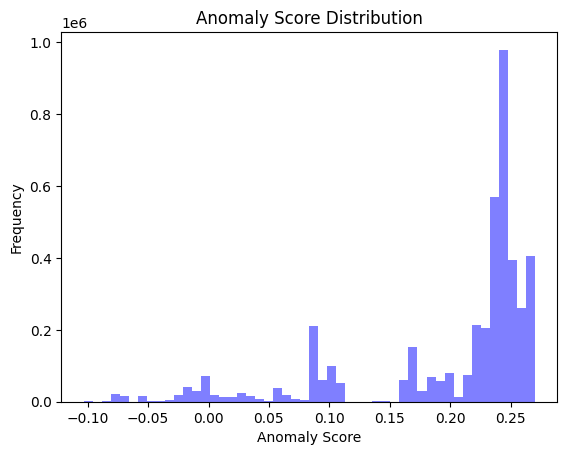

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Histogram of anomaly scores
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.5)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.show()

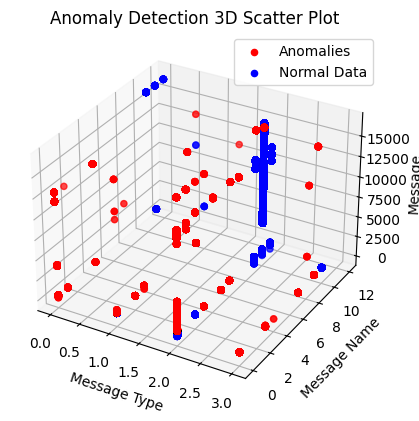

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Separate anomalies (Anomaly_Label == -1) and normal data (Anomaly_Label == 1)
anomalies = df[df['Anomaly_Label'] == -1]
normal_data = df[df['Anomaly_Label'] == 1]

# Scatter plot for anomalies in red
ax.scatter(anomalies['Message Type'], anomalies['Message Name'], anomalies['Message'], c='red', label='Anomalies')

# Scatter plot for normal data in blue
ax.scatter(normal_data['Message Type'], normal_data['Message Name'], normal_data['Message'], c='blue', label='Normal Data')

ax.set_xlabel('Message Type')
ax.set_ylabel('Message Name')
ax.set_zlabel('Message')
plt.title('Anomaly Detection 3D Scatter Plot')
plt.legend()

plt.show()


In [ ]:

# Next, we utilized 21 True anomalies identified by the Isolation Forest model 
# alongside a small set of non-anomalies to train our supervised model, specifically a Support Vector Machine (SVM). 
# The entire set of predictions generated by the Isolation Forest model served as the test data for the supervised model evaluation.

In [10]:
# Specify the sheet name and file path
sheet_name = 'Sheet2'
file_path = r'D:\Uconn\Fall 23\OPIM 5770 Caps\New errors.xlsx'

# Read the data from the specified sheet into a DataFrame
model_df = pd.read_excel(file_path, sheet_name=sheet_name)

# Get the length of the DataFrame
num_rows = len(model_df)

# Print or use the number of rows as needed
print(num_rows)


76


In [ ]:
# Below code block prepares the feature set (X) and the target variable (y) for training a machine learning model. 
# It drops the 'S.NO' and 'Anomaly_Label' columns from the feature set and truncates the 'Message' column to the first 19 characters. 
# The resulting feature set is displayed with the first 5 rows for inspection.

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'model_df'
# Drop 'S.NO' and 'Anomaly_Label' from the feature set
X = model_df.drop(['S.NO', 'Anomaly_Label'], axis=1)
X['Message'] = X['Message'].str[:19]  # Truncate the 'Message' column to the first 19 characters

# Use 'Anomaly_Label' as your target variable
y = model_df['Anomaly_Label']

# Display the first 5 rows of the feature set
X.head(5)


,Message Type,Message Name,Message,Anomaly_Score
0,ERROR,RssReader,Unable to satisfy @,-0.014974
1,ERROR,RssReader,Unable to satisfy @,-0.014974
2,WARN,RssReader,Unable to resolve h,-0.006900
3,ERROR,GeolocationIntentService,Unable to resolve h,-0.102943
4,ERROR,RssReaderIntentService,Unable to satisfy @,-0.013739


In [13]:
# Reverse label encoding for the 'Message Type' column in backtrack_df
backtrack_df = df.copy()
backtrack_df['Message Type'] = label_encoders['Message Type'].inverse_transform(backtrack_df['Message Type'])

# Reverse label encoding for the 'Message Name' column in backtrack_df
backtrack_df['Message Name'] = label_encoders['Message Name'].inverse_transform(backtrack_df['Message Name'])

# Reverse label encoding for the 'Message' column in backtrack_df
backtrack_df['Message'] = label_encoders['Message'].inverse_transform(backtrack_df['Message'])
backtrack_df['Message'] = backtrack_df['Message'].str[:19]  # Truncate the 'Message' column to the first 19 characters

# Display the first 5 rows of the reversed and truncated DataFrame
backtrack_df.head(5)


,Message Type,Message Name,Message,Anomaly_Score,Anomaly_Label
0,INFO,SignagePlayerActivity,Secondary Fallback:,0.243189,1
1,INFO,SignagePlayerActivity,Secondary Fallback:,0.246111,1
2,INFO,SignagePlayerActivity,Secondary Fallback:,0.253109,1
3,INFO,SignagePlayerActivity,Secondary Fallback:,0.259302,1
4,INFO,SignagePlayerActivity,Secondary Fallback:,0.251978,1


In [ ]:
# Below code block implements a Support Vector Machine (SVM) model for anomaly detection. 
# It encodes categorical columns using Label Encoding, prepares training and testing datasets, and trains the SVM model. 
# The model is then evaluated on the test set, and accuracy, precision, and F1 score are printed as performance metrics. 

In [14]:
# SVM Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Assuming your DataFrame is named 'model_df'
# If your data is in an Excel file, you can use pd.read_excel('your_file.xlsx')
# model_df = pd.read_excel('your_file.xlsx')

# Step 1: Label Encoding for categorical columns
le = LabelEncoder()
X['Message Type'] = le.fit_transform(X['Message Type'])
X['Message Name'] = le.fit_transform(X['Message Name'])
X['Message'] = le.fit_transform(X['Message'])

# Step 2: Making detected anomalies, non-anomalies file for Train Data and Unsupervised DataFrame as Test data
# Train
X_train = X
y_train = y

# Test Data
test_df = backtrack_df.copy()
X_test = test_df.drop(['Anomaly_Label'], axis=1)
X_test['Message Type'] = le.fit_transform(X_test['Message Type'])
X_test['Message Name'] = le.fit_transform(X_test['Message Name'])
X_test['Message'] = le.fit_transform(X_test['Message'])

# Use 'Anomaly_Label' as your target variable
y_test = test_df['Anomaly_Label']

# Train Test Split from the detected anomalies and non-anomalies records.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM Classifier
svm_classifier = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.94
Precision: 0.98
F1 Score: 0.97


In [15]:
# Create a Series from the predicted labels
y_pred_series = pd.Series(y_pred, name='Predicted_Label')

# Concatenate the original test data with the predicted labels
result_df = pd.concat([X_test, y_pred_series], axis=1)

# Display the first 5 rows of the DataFrame with predicted labels
result_df.head(5)


,Message Type,Message Name,Message,Anomaly_Score,Predicted_Label
0,2,10,122,0.243189,1
1,2,10,122,0.246111,1
2,2,10,122,0.253109,1
3,2,10,122,0.259302,1
4,2,10,122,0.251978,1


In [16]:
# Create a copy of the DataFrame with predicted labels
backtrack_df_1 = result_df.copy()

# Reverse label encoding for the 'Message Type' column in backtrack_df_1
backtrack_df_1['Message Type'] = label_encoders['Message Type'].inverse_transform(backtrack_df_1['Message Type'])

# Reverse label encoding for the 'Message Name' column in backtrack_df_1
backtrack_df_1['Message Name'] = label_encoders['Message Name'].inverse_transform(backtrack_df_1['Message Name'])

# Reverse label encoding for the 'Message' column in backtrack_df_1
backtrack_df_1['Message'] = label_encoders['Message'].inverse_transform(backtrack_df_1['Message'])

# Display the first 5 rows of the DataFrame with reversed label encoding
backtrack_df_1.head(5)

# Uncomment the following line if you want to filter anomalies predicted by the SVM
# anomalies_svc = backtrack_df_1[backtrack_df_1['Predicted_Label'] == -1]


,Message Type,Message Name,Message,Anomaly_Score,Predicted_Label
0,INFO,SignagePlayerActivity,"2023-07-31 10:18:05,954 -0400 - [ERROR::Conten...",0.243189,1
1,INFO,SignagePlayerActivity,"2023-07-31 10:18:05,954 -0400 - [ERROR::Conten...",0.246111,1
2,INFO,SignagePlayerActivity,"2023-07-31 10:18:05,954 -0400 - [ERROR::Conten...",0.253109,1
3,INFO,SignagePlayerActivity,"2023-07-31 10:18:05,954 -0400 - [ERROR::Conten...",0.259302,1
4,INFO,SignagePlayerActivity,"2023-07-31 10:18:05,954 -0400 - [ERROR::Conten...",0.251978,1


In [17]:
# Filter anomalies predicted by the SVM
anomalies_svc = backtrack_df_1[backtrack_df_1['Predicted_Label'] == -1]

# Display the first 5 rows of the DataFrame with predicted anomalies
anomalies_svc.head(5)

# If needed to download the anomalies_svc DataFrame to a CSV file, uncomment the following line
# anomalies_svc.to_csv('anomalies_svc.csv', index=False)


,Message Type,Message Name,Message,Anomaly_Score,Predicted_Label
33,INFO,HttpHeadRequestTest,"2023-07-31 09:18:06,081 -0400 - [ERROR::Conten...",0.0,-1
135,INFO,HttpHeadRequestTest,"2023-07-31 09:18:06,081 -0400 - [ERROR::Conten...",0.0,-1
251,INFO,HttpHeadRequestTest,"2023-07-31 09:18:06,081 -0400 - [ERROR::Conten...",0.0,-1
352,INFO,HttpHeadRequestTest,"2023-07-31 09:18:06,081 -0400 - [ERROR::Conten...",0.0,-1
428,INFO,HttpHeadRequestTest,"2023-07-31 09:18:06,081 -0400 - [ERROR::Conten...",0.0,-1


In [18]:
# Get the total number of records in the original DataFrame
total_records = len(df)
print("Total records in the DataFrame:", total_records)

# Count the anomalies detected by the Isolation Forest model
anomalies_ifm = df[df['Anomaly_Label'] == -1]
print("Anomalies count in unsupervised learning:", len(anomalies_ifm))

# Count the anomalies predicted by the SVM model
print("Anomalies count in supervised learning:", len(anomalies_svc))


Total records in the DataFrame: 4381817
Anomalies count in unsupervised learning: 158513
Anomalies count in supervised learning: 261787


In [ ]:
# Below code block truncates the 'Message' column in the anomalies_svc DataFrame to the first 50 characters and 
# then removes duplicate rows based on the truncated message. 
# The length of the cleaned DataFrame is then printed, indicating the number of unique anomalies after cleaning

In [19]:
# Truncate the 'Message' column to the first 50 characters in anomalies_svc
anomalies_svc['Message_Trim'] = anomalies_svc['Message'].str[:50]

# Drop duplicate rows based on the 'Message_Trim' column
anomalies_svc = anomalies_svc.drop_duplicates(subset=['Message_Trim'])

# Get the length of the cleaned anomalies_svc DataFrame
num_unique_anomalies = len(anomalies_svc)
print("Number of unique anomalies after cleaning:", num_unique_anomalies)


Number of unique anomalies after cleaning: 137


C:\Users\ashri\AppData\Local\Temp\ipykernel_17672\2416828247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies_svc['Message_Trim'] = anomalies_svc['Message'].str[:50]


In [23]:
# Display the anomalies_svc DataFrame
anomalies_svc


,Message Type,Message Name,Message,Anomaly_Score,Predicted_Label,Message_Trim
33,INFO,HttpHeadRequestTest,"2023-07-31 09:18:06,081 -0400 - [ERROR::Conten...",0.000000,-1,"2023-07-31 09:18:06,081 -0400 - [ERROR::Conten..."
877,INFO,NetworkStatusIntentService,"2023-07-31 09:18:06,242 -0400 - [ERROR::Conten...",-0.023464,-1,"2023-07-31 09:18:06,242 -0400 - [ERROR::Conten..."
3999,INFO,HttpHelper,"2023-07-31 09:18:06,208 -0400 - [ERROR::Conten...",-0.018138,-1,"2023-07-31 09:18:06,208 -0400 - [ERROR::Conten..."
4001,INFO,ContentManager,"2023-07-31 12:46:06,292 -0400 - [ERROR::Conten...",-0.071760,-1,"2023-07-31 12:46:06,292 -0400 - [ERROR::Conten..."
4002,INFO,ContentManager,"2023-07-31 09:18:06,327 -0400 - [ERROR::Conten...",0.009432,-1,"2023-07-31 09:18:06,327 -0400 - [ERROR::Conten..."
...,...,...,...,...,...,...
2039873,INFO,LogUploadIntentService,"2023-07-31 15:41:59,497 -0400 - [ERROR::Conten...",-0.049016,-1,"2023-07-31 15:41:59,497 -0400 - [ERROR::Conten..."
2655731,INFO,LogUploadIntentService,"2023-07-31 15:41:59,248 -0400 - [ERROR::Conten...",-0.049016,-1,"2023-07-31 15:41:59,248 -0400 - [ERROR::Conten..."
2820427,INFO,LogUploadIntentService,"2023-07-31 13:55:03,317 -0400 - [ERROR::Conten...",-0.049016,-1,"2023-07-31 13:55:03,317 -0400 - [ERROR::Conten..."
2837582,INFO,LogUploadIntentService,"2023-07-31 13:55:07,684 -0400 - [ERROR::Conten...",-0.049016,-1,"2023-07-31 13:55:07,684 -0400 - [ERROR::Conten..."


In [ ]:
# 3D scatter plot: visualizing the relationship between three variables: 'Message Type', 'Message Name', and 'Anomaly Score'. 

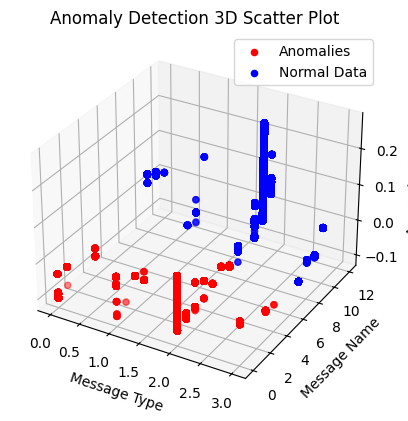

In [25]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Separate anomalies (Anomaly_Label == -1) and normal data (Anomaly_Label == 1)
anomalies = result_df[result_df['Predicted_Label'] == -1]
normal_data = result_df[result_df['Predicted_Label'] == 1]

# Scatter plot for anomalies in red
ax.scatter(anomalies['Message Type'], anomalies['Message Name'], anomalies['Anomaly_Score'], c='red', label='Anomalies')

# Scatter plot for normal data in blue
ax.scatter(normal_data['Message Type'], normal_data['Message Name'], normal_data['Anomaly_Score'], c='blue', label='Normal Data')

ax.set_xlabel('Message Type')
ax.set_ylabel('Message Name')
ax.set_zlabel('Anomaly Score')
plt.title('Anomaly Detection 3D Scatter Plot')
plt.legend()

plt.show()
#1653seconds to run
